# SMT Python Seminar - STL mesh manipulation

* reading an STL file with `numpy-stl`
* rotation with `scipy.spatial.transform`

More on the Jupyter magic commands: https://alexsm.com/jupyter-notebook-ipython-magic/

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy.spatial.transform import Rotation

In [4]:
import stl

/Users/alex/miniconda3/envs/ml36/lib/python3.6/importlib/_bootstrap.py:219: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return f(*args, **kwds)


In [5]:
donut = stl.mesh.Mesh.from_file('../data/HalfDonut.stl')

In [6]:
donut.vectors.shape

(288, 3, 3)

In [7]:
donut.points.shape

(288, 9)

In [8]:
donut.normals.shape

(288, 3)

In [9]:
donut.vectors[0]

array([[0.399344, 0.46194 , 1.04409 ],
       [0.5     , 0.5     , 1.5     ],
       [0.57612 , 0.5     , 1.11732 ]], dtype=float32)

In [10]:
donut.points[0]

array([0.399344, 0.46194 , 1.04409 , 0.5     , 0.5     , 1.5     ,
       0.57612 , 0.5     , 1.11732 ], dtype=float32)

In [11]:
donut.normals[0]

array([-0.01456481,  0.07322292, -0.00289713], dtype=float32)

In [12]:
def visualize_mesh(m):
    
    fig = plt.figure(figsize=(10, 8))
    axes = mplot3d.Axes3D(fig)

    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors, facecolors='white', linewidths=1))
    axes.add_collection3d(mplot3d.art3d.Line3DCollection(m.vectors))
    axes.view_init(elev=30, azim=45)

    scale = m.points.ravel()
    axes.auto_scale_xyz(scale, scale, scale)

    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_zlabel('z')

    plt.show()

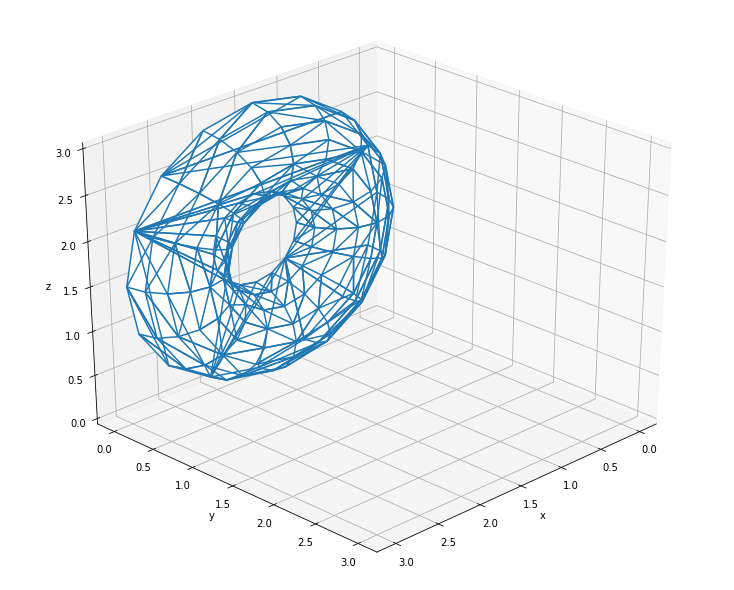

In [13]:
visualize_mesh(donut)

In [14]:
r = Rotation.from_euler('xyz', [90, 0, 0], degrees=True)

t = np.zeros((4, 4))
t[:3, :3] = r.as_dcm()
t[-1, -1] = 1

In [15]:
donut.transform(t)

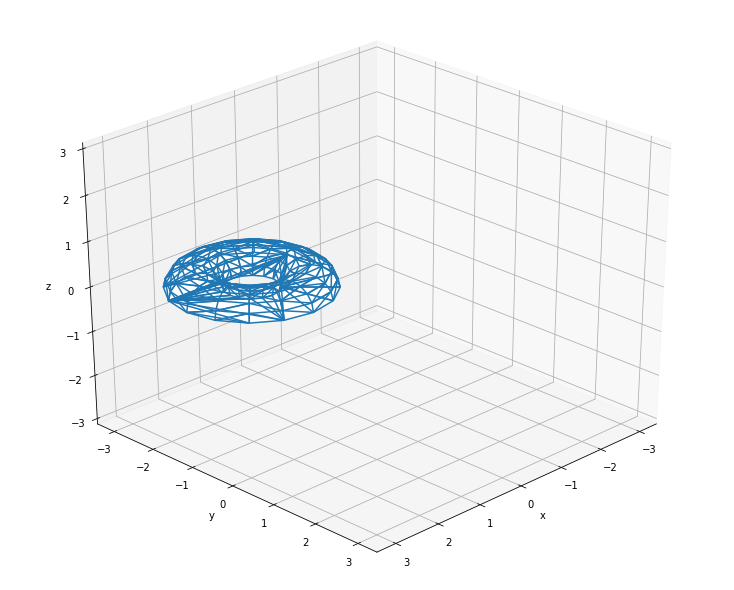

In [16]:
visualize_mesh(donut)